In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from datetime import datetime

import matplotlib.dates as mdates
#from matplotlib import pyplot

Using TensorFlow backend.


In [91]:
pd.set_option('display.max_rows', 10000)

In [49]:
df_new=pd.concat([pd.read_csv('Copy of pcie_eye_2017_MR.csv',delimiter=";"),pd.read_csv('Copy of pcie_eye_2018_MR.csv',delimiter=","),pd.read_csv('Copy of pice_eye_2019_MR.csv',delimiter=";"),pd.read_csv('Copy of pcie_eye_2020_MR.csv',delimiter=";")])

In [50]:
df_new

,DATA_FLAGS,test date,LEVEL,MACHINE_SERIAL,MACHINE_TYPE,COMPONENT_ID,COMPONENT_PN,BIT,PLUGPOSITION,PREFIX,CATEGORY,PARM_LABEL,PARM_VALUE,Unnamed: 13
0,ACHAR|PBU|ARRAYCE,01/12/2017,FULF,FE5C7,3907,01KU417YH10HM79F00J,01KU418,7.0,IDT0,C34S4112.ROOSEVELT,PbuData,EYE_WIDTH,23.0,NaN
1,ACHAR|PBU|ARRAYCE,01/12/2017,FULF,FE5C7,3907,00LU469YH10UE7AC336,00LR284,1.0,IDT0,C16S25865.CONST,PbuData,EYE_WIDTH,24.0,NaN
2,ACHAR|PBU,11/12/2017,FULF,FDAA7,3907,00LU469YH10UE79B485,00LR284,1.0,IDT0,C16S25865.CONST,PbuData,EYE_WIDTH,23.0,NaN
3,ACHAR|PBU,08/12/2017,FULF,FDAA7,3907,00LU469YH10UE79B485,00LR284,1.0,IDT0,C16S25865.CONST,PbuData,EYE_WIDTH,23.0,NaN
4,ACHAR|PBU,11/12/2017,FULF,FDAA7,3907,01KU417YH10HM79A04V,01KU418,7.0,IDT0,C34S4112.ROOSEVELT,PbuData,EYE_WIDTH,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,ACHAR|PBU,12/05/2020,FULF,"3,43E+10",3907,11S02CY396YH1934660214,02CY396,0.0,PB1,N0CP2.CP,PbuData,EYE_WIDTH,17.0,NaN
5564,ACHAR|PBU,12/05/2020,FULF,"3,43E+10",3907,11S02CY386YH1934675486,02CY386,2.0,PB1,N0CP1.CP,PbuData,EYE_WIDTH,15.0,NaN
5565,ACHAR|PBU,12/05/2020,FULF,"3,43E+10",3907,11S02CY386YH1934675486,02CY386,13.0,PB1,N0CP1.CP,PbuData,EYE_WIDTH,14.0,NaN
5566,ACHAR|PBU,12/05/2020,FULF,"3,43E+10",3907,11S02CY386YH1934675486,02CY386,0.0,PB1,N0CP1.CP,PbuData,EYE_WIDTH,15.0,NaN


In [51]:
df_new=df_new.drop_duplicates()

In [52]:
df_new['PARM_VALUE'].unique()

array([23., 24., 25., 15., 12., 14., 13., 17., 16., 21., 22., 20., 18.,
       19., 10., 11., 26.,  0.,  9.,  7.,  8.,  6.,  4.,  3.,  1.,  2.,
        5.])

In [53]:
df_new['PARM_VALUE']=3.9 * df_new['PARM_VALUE']

C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
np.sort(df_new['PARM_VALUE'].unique())

array([  0. ,   3.9,   7.8,  11.7,  15.6,  19.5,  23.4,  27.3,  31.2,
        35.1,  39. ,  42.9,  46.8,  50.7,  54.6,  58.5,  62.4,  66.3,
        70.2,  74.1,  78. ,  81.9,  85.8,  89.7,  93.6,  97.5, 101.4])

In [55]:
df_new['PARM_VALUE'].value_counts()

58.5     18649
62.4     17924
66.3     17828
54.6     13591
50.7      9367
70.2      6378
46.8      3863
0.0       1374
42.9      1182
74.1       973
39.0       275
35.1       118
89.7        46
85.8        46
81.9        30
78.0        27
31.2        25
93.6        23
97.5        12
101.4        6
15.6         5
27.3         5
23.4         3
11.7         3
19.5         2
7.8          1
3.9          1
Name: PARM_VALUE, dtype: int64

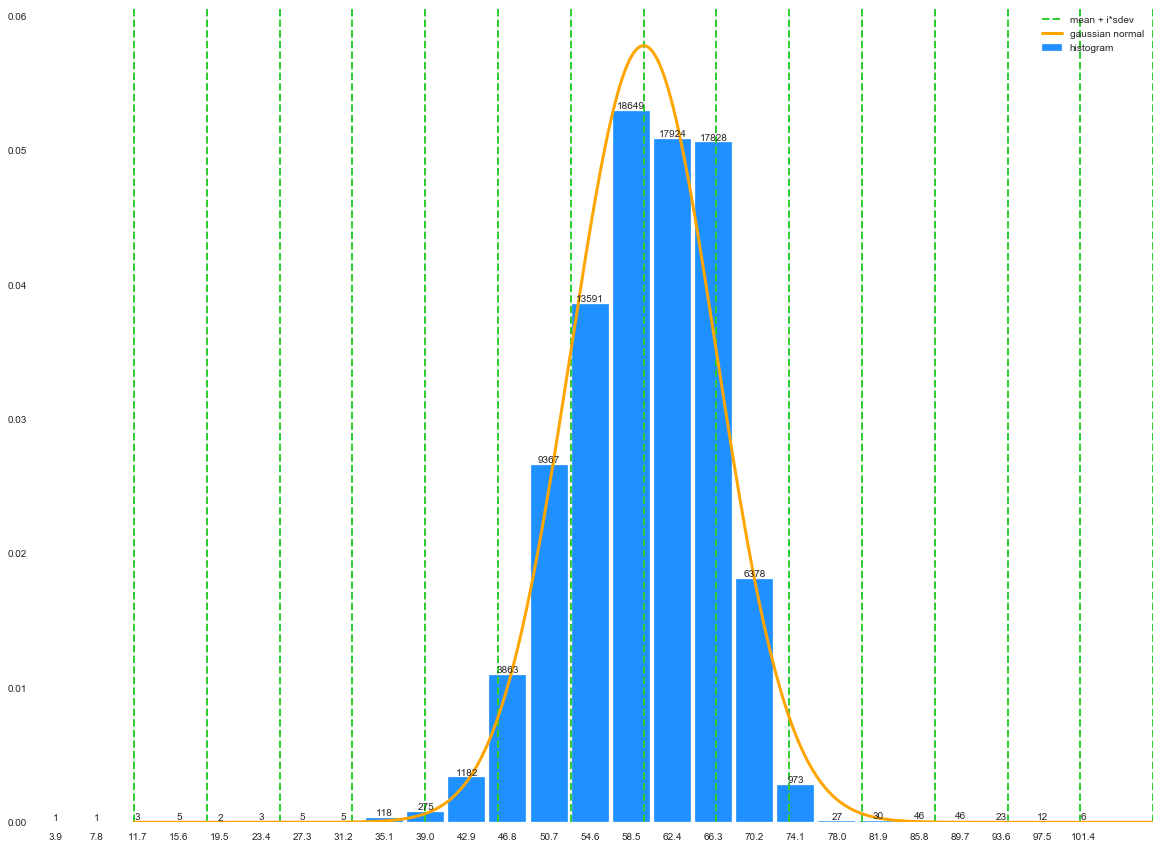

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

l = { 3.9:1,7.8:1,11.7:3,15.6:5,19.5:2,23.4:3,27.3:5,31.2:5,35.1: 118, 39.0: 275, 42.9: 1182, 46.8: 3863, 50.7: 9367, 54.6: 13591, 58.5: 18649, 62.4: 17924, 66.3: 17828, 70.2: 6378, 74.1: 973, 78.0: 27,81.9:30,85.8:46,89.7:46,93.6:23,97.5:12,101.4:6}
# convert the dictionary to a list
l_array = np.array( [k for k, v in l.items() for _ in range(v)])

plt.figure(figsize=(20,15))
s = sum(l.values())
bin_width = 3.9
bin_centers = list(l.keys())
heights = [v/s/bin_width for v in l.values()]
plt.bar(bin_centers, heights, width=bin_width*0.9, color='dodgerblue', label='histogram')
for c, h, v in zip(bin_centers, heights, l.values()):
    plt.text(c, h, v, ha='center', va='bottom')
plt.xticks(bin_centers)
mean = l_array.mean()
sdev = l_array.std()
for i in range(-7, 8):
    plt.axvline(mean+i*sdev, color='limegreen', ls='--', lw=2, label='mean + i*sdev' if i == 0 else None)

x = np.linspace(mean-7*sdev, mean+7*sdev, 500)
plt.plot(x, norm.pdf(x, mean, sdev), color='orange', lw=3, label='gaussian normal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

In [57]:
df_new['PARM_VALUE'].mean()

58.76730494675635

In [59]:
df_new['PLUGPOSITION'].value_counts()

PB1     65707
PB0     25869
IDT0      181
Name: PLUGPOSITION, dtype: int64

In [60]:
df_new['PREFIX'].value_counts()

N0CP2.CP              41022
N0CP1.CP              26415
N1CP2.CP              14645
N1CP1.CP               9494
C16S25865.CONST          91
C34S4112.ROOSEVELT       90
Name: PREFIX, dtype: int64

In [61]:
df_new=df_new[  (df_new['PLUGPOSITION'].isin(['PB0','PB1']) & (df_new['PARM_VALUE']!= 0))]

In [62]:
df_new['PARM_VALUE'].value_counts()

58.5    18649
62.4    17922
66.3    17825
54.6    13591
50.7     9367
70.2     6377
46.8     3863
42.9     1182
74.1      969
39.0      275
35.1      118
31.2       25
78.0       19
15.6        5
27.3        5
11.7        3
23.4        3
19.5        2
3.9         1
7.8         1
Name: PARM_VALUE, dtype: int64

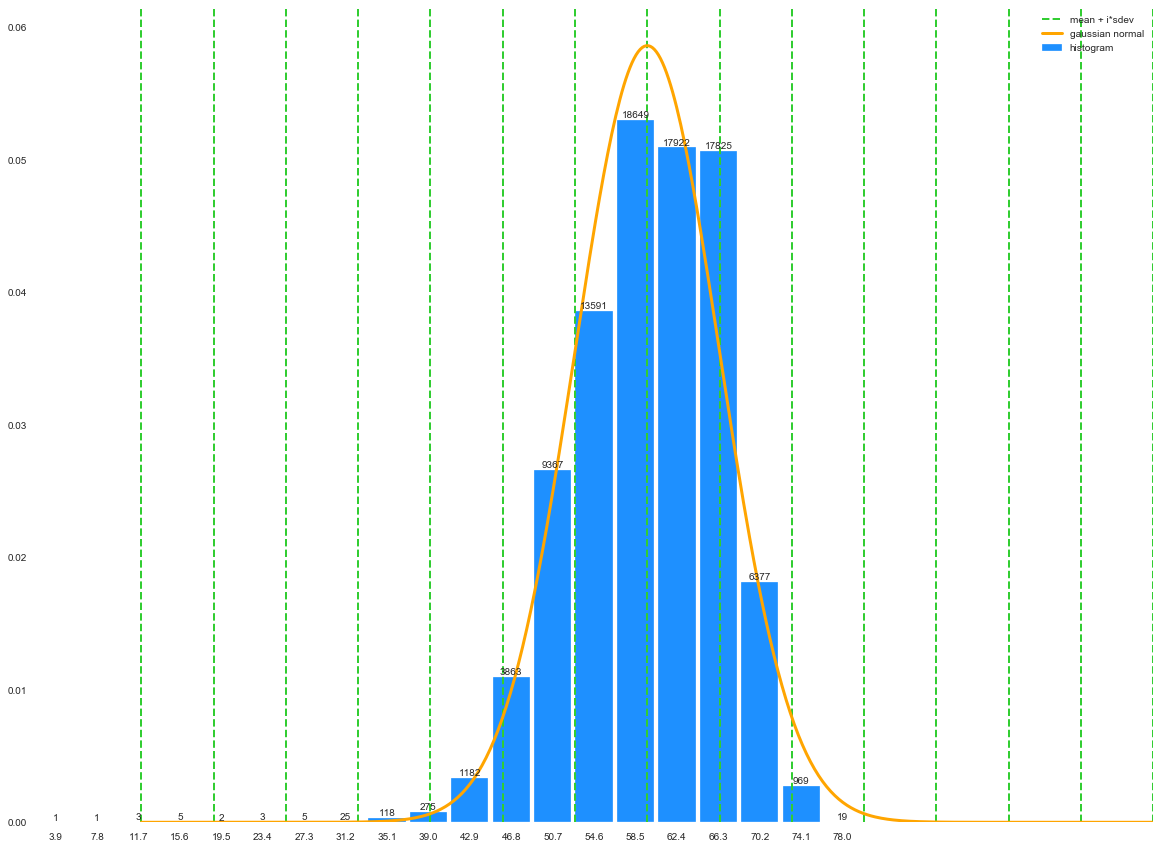

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

l = { 3.9:1,7.8:1,11.7:3,15.6:5,19.5:2,23.4:3,27.3:5,31.2:25,35.1: 118, 39.0: 275, 42.9: 1182, 46.8: 3863, 50.7: 9367, 54.6: 13591, 58.5: 18649, 62.4: 17922, 66.3: 17825, 70.2: 6377, 74.1: 969, 78.0: 19}
# convert the dictionary to a list
l_array = np.array( [k for k, v in l.items() for _ in range(v)])

plt.figure(figsize=(20,15))
s = sum(l.values())
bin_width = 3.9
bin_centers = list(l.keys())
heights = [v/s/bin_width for v in l.values()]
plt.bar(bin_centers, heights, width=bin_width*0.9, color='dodgerblue', label='histogram')
for c, h, v in zip(bin_centers, heights, l.values()):
    plt.text(c, h, v, ha='center', va='bottom')
plt.xticks(bin_centers)
mean = l_array.mean()
sdev = l_array.std()
for i in range(-7, 8):
    plt.axvline(mean+i*sdev, color='limegreen', ls='--', lw=2, label='mean + i*sdev' if i == 0 else None)

x = np.linspace(mean-7*sdev, mean+7*sdev, 500)
plt.plot(x, norm.pdf(x, mean, sdev), color='orange', lw=3, label='gaussian normal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

In [67]:
df_new[['BIT','PARM_VALUE','PLUGPOSITION']].groupby(['BIT','PLUGPOSITION']).mean()

PARM_VALUE
BIT  PLUGPOSITION            
0.0  PB0            64.232381
     PB1            64.240722
1.0  PB0            61.838261
     PB1            61.488740
2.0  PB0            60.333270
     PB1            62.759985
3.0  PB0            59.459737
     PB1            62.749369
4.0  PB0            59.208868
     PB1            57.750295
5.0  PB0            58.111952
     PB1            58.395974
6.0  PB0            58.529434
     PB1            57.632906
7.0  PB0            56.735773
     PB1            57.622884
8.0  PB0            59.750382
     PB1            58.605587
9.0  PB0            57.716080
     PB1            58.499037
10.0 PB0            58.666583
     PB1            57.459936
11.0 PB0            59.509470
     PB1            58.751365
12.0 PB0            61.073070
     PB1            57.874896
13.0 PB0            60.265107
     PB1            57.744387
14.0 PB0            61.027457
     PB1            59.442942
15.0 PB0            62.059151
     PB1            60.941007

In [68]:
df_new[['BIT','PARM_VALUE','PLUGPOSITION']].groupby(['BIT','PLUGPOSITION']).std()

PARM_VALUE
BIT  PLUGPOSITION            
0.0  PB0             5.857278
     PB1             5.478415
1.0  PB0             6.032499
     PB1             5.297319
2.0  PB0             6.532212
     PB1             6.064422
3.0  PB0             7.125938
     PB1             6.109265
4.0  PB0             6.648930
     PB1             6.865018
5.0  PB0             7.134989
     PB1             6.649919
6.0  PB0             6.841527
     PB1             6.725917
7.0  PB0             6.810672
     PB1             6.876775
8.0  PB0             6.240506
     PB1             6.514871
9.0  PB0             7.091027
     PB1             6.836551
10.0 PB0             7.134988
     PB1             6.352038
11.0 PB0             6.893595
     PB1             6.814330
12.0 PB0             6.433048
     PB1             6.873113
13.0 PB0             7.089212
     PB1             7.056421
14.0 PB0             6.170882
     PB1             6.469319
15.0 PB0             5.371958
     PB1             5.655928

In [69]:
np.std(df_new['PARM_VALUE'])

6.804629885558006

In [70]:
len(df_new)

90202

In [94]:
df_new[df_new['PARM_VALUE']< 31.2]['COMPONENT_ID'].value_counts()

11S02CY386YH1934675476    1
11S02CY387YH1934490494    1
11S02CY392YH1934772623    1
11S02CY392YH1934594974    1
11S00DE100YH110402L000    1
11S00DE110YH110492R000    1
11S02CY386YH1934798627    1
11S02CY386YH1934813521    1
11S02AA466YH1934037629    1
11S00DE100YH110494P000    1
11S00DE126YH11048C7004    1
11S02CY396YH1934502164    1
11S02CY399YH1934492182    1
11S02CY386YH1934499747    1
11S02CY396YH1934500077    1
11S02CY386YH1934833111    1
11S00DE108YH1002858001    1
11S02CY386YH1934518170    1
11S02AA244YH3933939983    1
11S00DE108YH100285E003    1
Name: COMPONENT_ID, dtype: int64

In [75]:
componentslow=list(df_new[df_new['PARM_VALUE']< 31.2]['COMPONENT_ID'])

In [103]:
df_new[df_new['PARM_VALUE']< 31.2][['COMPONENT_ID','BIT','PLUGPOSITION','PARM_VALUE','PREFIX','test date']]

,COMPONENT_ID,BIT,PLUGPOSITION,PARM_VALUE,PREFIX,test date
1496,11S02AA244YH3933939983,9.0,PB1,27.3,N1CP1.CP,2018-04-24
20402,11S00DE108YH100285E003,13.0,PB1,23.4,N1CP2.CP,2018-06-15
20878,11S02AA466YH1934037629,12.0,PB1,15.6,N1CP1.CP,2018-05-04
29211,11S02CY399YH1934492182,8.0,PB1,11.7,N1CP1.CP,2018-06-27
31990,11S02CY386YH1934518170,9.0,PB0,27.3,N0CP1.CP,2018-12-11
35647,11S02CY387YH1934490494,12.0,PB0,11.7,N0CP2.CP,2018-05-26
41495,11S02CY396YH1934502164,11.0,PB1,15.6,N0CP2.CP,2018-12-04
51349,11S00DE108YH1002858001,8.0,PB1,3.9,N1CP2.CP,2018-05-16
8267,11S02CY396YH1934500077,4.0,PB1,7.8,N0CP2.CP,23/03/2019
8550,11S00DE110YH110492R000,10.0,PB0,27.3,N1CP2.CP,25/03/2019


In [79]:
df_new[df_new['COMPONENT_ID'].isin(componentslow)]

,DATA_FLAGS,test date,LEVEL,MACHINE_SERIAL,MACHINE_TYPE,COMPONENT_ID,COMPONENT_PN,BIT,PLUGPOSITION,PREFIX,CATEGORY,PARM_LABEL,PARM_VALUE,Unnamed: 13
442,ACHAR|PBU,2018-09-24,FULF,19B48,3907,11S02CY399YH1934492182,02CY399,7.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,66.3,NaN
445,ACHAR|PBU,2018-09-04,FULF,0B388,3907,11S02CY399YH1934492182,02CY399,7.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,54.6,NaN
450,ACHAR|PBU,2018-08-21,FULF,12DA8,3907,11S02CY399YH1934492182,02CY399,7.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,54.6,NaN
457,ACHAR|PBU,2018-06-27,FULF,12DA8,3907,11S02CY399YH1934492182,02CY399,7.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,50.7,NaN
685,ACHAR|PBU,2018-12-11,FULF,1EC58,3907,11S02CY386YH1934518170,02CY386,2.0,PB1,N0CP1.CP,PbuData,EYE_WIDTH,62.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,ACHAR|PBU,02/04/2020,FULF,43EA8,3907,11S02CY386YH1934833111,02CY386,11.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,15.6,NaN
4621,ACHAR|PBU,02/04/2020,FULF,43EA8,3907,11S02CY386YH1934833111,02CY386,6.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,39.0,NaN
4622,ACHAR|PBU,02/04/2020,FULF,43EA8,3907,11S02CY386YH1934833111,02CY386,8.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,46.8,NaN
4627,ACHAR|PBU,02/04/2020,FULF,43EA8,3907,11S02CY386YH1934833111,02CY386,3.0,PB1,N1CP1.CP,PbuData,EYE_WIDTH,35.1,NaN


In [81]:
l=dict(df_new[df_new['COMPONENT_ID'].isin(componentslow)].groupby('PARM_VALUE')['COMPONENT_ID'].unique())

In [82]:
for key,values in l.items():
    l[key]=len(values)

In [83]:
l.values()

dict_values([1, 1, 3, 5, 2, 3, 5, 5, 14, 16, 15, 16, 17, 15, 16, 16, 16, 12, 7])

In [85]:
l

{3.9: 1,
 7.8: 1,
 11.7: 3,
 15.6: 5,
 19.5: 2,
 23.4: 3,
 27.3: 5,
 31.2: 5,
 35.1: 14,
 39.0: 16,
 42.9: 15,
 46.8: 16,
 50.699999999999996: 17,
 54.6: 15,
 58.5: 16,
 62.4: 16,
 66.3: 16,
 70.2: 12,
 74.1: 7}

Text(0, 0.5, 'Length of value')

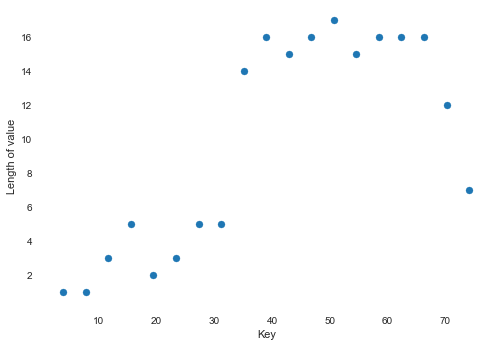

In [84]:
#y = [value.size for value in l.values()]

fig, ax = plt.subplots(1, 1)

ax.scatter(l.keys(), l.values())
ax.set_xlabel('Key')
ax.set_ylabel('Length of value')

In [104]:
df_new[df_new['COMPONENT_ID'].isin(componentslow)][['COMPONENT_ID','PARM_VALUE','test date','PREFIX']].groupby(['COMPONENT_ID','PARM_VALUE','PREFIX']).agg(list)

test date
COMPONENT_ID           PARM_VALUE PREFIX                                                     
11S00DE100YH110402L000 15.6       N0CP2.CP                                       [07/03/2020]
                       35.1       N0CP2.CP                                       [07/03/2020]
                       42.9       N0CP2.CP                                       [07/03/2020]
                       46.8       N0CP2.CP                                       [07/03/2020]
                       50.7       N0CP2.CP                           [07/03/2020, 07/03/2020]
                       54.6       N0CP2.CP                           [07/03/2020, 07/03/2020]
                       58.5       N0CP2.CP   [07/03/2020, 07/03/2020, 07/03/2020, 07/03/2020]
                       62.4       N0CP2.CP   [07/03/2020, 07/03/2020, 07/03/2020, 07/03/2020]
                       66.3       N0CP2.CP               [07/03/2020, 07/03/2020, 07/03/2020]
11S00DE100YH110494P000 27.3       N0CP2.CP                                       [15/06/2019]
                       35.1       N0CP2.CP                                       [24/05/2019]
                       39.0       N0CP2.CP               [15/06/2019, 15/06/2019, 15/06/2019]
                       42.9       N0CP2.CP                                       [15/06/2019]
                       46.8       N0CP2.CP                                       [24/05/2019]
                       50.7       N0CP2.CP               [24/05/2019, 24/05/2019, 15/06/2019]
                       54.6       N0CP2.CP                                       [24/05/2019]
                       58.5       N0CP2.CP  [24/05/2019, 24/05/2019, 24/05/2019, 24/05/201...
                       62.4       N0CP2.CP  [24/05/2019, 24/05/2019, 24/05/2019, 24/05/201...
                       66.3       N0CP2.CP  [24/05/2019, 24/05/2019, 24/05/2019, 24/05/201...
                       70.2       N0CP2.CP  [24/05/2019, 24/05/2019, 24/05/2019, 15/06/201...
                       74.1       N0CP2.CP                           [24/05/2019, 24/05/2019]
11S00DE108YH1002858001 3.9        N1CP2.CP                                       [2018-05-16]
                       39.0       N1CP2.CP                           [2018-05-16, 2018-05-16]
                       42.9       N1CP2.CP                                       [2018-05-16]
                       50.7       N1CP2.CP                                       [2018-05-16]
11S00DE108YH100285E003 23.4       N1CP2.CP                                       [2018-06-15]
                       35.1       N1CP2.CP                           [2018-06-15, 2018-06-15]
                       39.0       N1CP2.CP                                       [2018-06-15]
                       42.9       N1CP2.CP                                       [2018-06-15]
                       46.8       N1CP2.CP   [2018-06-15, 2018-05-27, 2018-05-27, 2018-06-20]
                       50.7       N1CP2.CP  [2018-06-20, 2018-05-27, 2018-06-14, 2018-06-2...
                       54.6       N1CP2.CP  [2018-06-14, 2018-06-08, 2018-06-20, 2018-06-0...
                       58.5       N1CP2.CP  [2018-05-27, 2018-06-14, 2018-06-14, 2018-06-1...
                       62.4       N1CP2.CP  [2018-06-14, 2018-05-27, 2018-06-08, 2018-05-2...
                       66.3       N1CP2.CP  [2018-06-20, 2018-06-08, 2018-05-27, 2018-06-2...
                       70.2       N1CP2.CP   [2018-06-14, 2018-06-20, 2018-06-20, 2018-05-27]
11S00DE110YH110492R000 27.3       N1CP2.CP                                       [25/03/2019]
                       31.2       N1CP2.CP                                       [25/03/2019]
                       35.1       N1CP2.CP               [25/03/2019, 25/03/2019, 25/03/2019]
                       39.0       N1CP2.CP               [25/03/2019, 25/03/2019, 25/03/2019]
                       46.8       N1CP2.CP               [25/03/2019, 25/03/2019, 25/03/2019]
                       50.7       N1CP2.CP

In [100]:
df_new[df_new['COMPONENT_ID']=='11S00DE108YH1002858001']

,DATA_FLAGS,test date,LEVEL,MACHINE_SERIAL,MACHINE_TYPE,COMPONENT_ID,COMPONENT_PN,BIT,PLUGPOSITION,PREFIX,CATEGORY,PARM_LABEL,PARM_VALUE,Unnamed: 13
20410,ACHAR|PBU,2018-05-16,FULF,0D838,3907,11S00DE108YH1002858001,00DE108,13.0,PB1,N1CP2.CP,PbuData,EYE_WIDTH,42.9,NaN
43567,ACHAR|PBU,2018-05-16,FULF,0D838,3907,11S00DE108YH1002858001,00DE108,12.0,PB1,N1CP2.CP,PbuData,EYE_WIDTH,39.0,NaN
44111,ACHAR|PBU,2018-05-16,FULF,0D838,3907,11S00DE108YH1002858001,00DE108,6.0,PB1,N1CP2.CP,PbuData,EYE_WIDTH,50.7,NaN
49315,ACHAR|PBU,2018-05-16,FULF,0D838,3907,11S00DE108YH1002858001,00DE108,3.0,PB1,N1CP2.CP,PbuData,EYE_WIDTH,39.0,NaN
51349,ACHAR|PBU,2018-05-16,FULF,0D838,3907,11S00DE108YH1002858001,00DE108,8.0,PB1,N1CP2.CP,PbuData,EYE_WIDTH,3.9,NaN


In [96]:
df_new[df_new['COMPONENT_ID'].isin(componentslow)][['BIT','PARM_VALUE','PLUGPOSITION']].groupby(['BIT','PLUGPOSITION']).mean()

PARM_VALUE
BIT  PLUGPOSITION            
0.0  PB0            67.600000
     PB1            65.140541
1.0  PB0            64.350000
     PB1            60.558333
2.0  PB0            62.629412
     PB1            61.886842
3.0  PB0            56.333333
     PB1            58.221429
4.0  PB0            57.633333
     PB1            55.927660
5.0  PB0            58.294737
     PB1            54.600000
6.0  PB0            50.700000
     PB1            58.705263
7.0  PB0            58.283333
     PB1            52.806000
8.0  PB0            54.166667
     PB1            54.440816
9.0  PB0            55.380000
     PB1            54.356250
10.0 PB0            53.573684
     PB1            54.068182
11.0 PB0            61.252941
     PB1            55.640000
12.0 PB0            60.233333
     PB1            55.656250
13.0 PB0            58.500000
     PB1            55.869767
14.0 PB0            65.812500
     PB1            57.915000
15.0 PB0            62.920000
     PB1            60.000000

In [97]:
df_new[df_new['COMPONENT_ID'].isin(componentslow)][['BIT','PARM_VALUE','PLUGPOSITION']].groupby(['BIT','PLUGPOSITION']).std()

PARM_VALUE
BIT  PLUGPOSITION            
0.0  PB0             3.508968
     PB1             5.106938
1.0  PB0             3.668106
     PB1             4.975791
2.0  PB0            10.453036
     PB1             7.091722
3.0  PB0             9.289209
     PB1             8.926380
4.0  PB0            10.580059
     PB1            12.178468
5.0  PB0            12.635685
     PB1             8.951577
6.0  PB0             7.268751
     PB1             7.744325
7.0  PB0            12.723681
     PB1             9.494669
8.0  PB0            10.523531
     PB1            12.761187
9.0  PB0            14.010320
     PB1            12.806762
10.0 PB0            13.991896
     PB1            11.240226
11.0 PB0             9.017006
     PB1            13.183657
12.0 PB0            13.121783
     PB1            11.761783
13.0 PB0             7.164757
     PB1            10.517299
14.0 PB0             3.996311
     PB1             7.676523
15.0 PB0             2.898571
     PB1             7.302559

In [123]:
np.sort(df_new['PARM_VALUE'].unique())

array([ 3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. , 42.9,
       46.8, 50.7, 54.6, 58.5, 62.4, 66.3, 70.2, 74.1, 78. ])

In [124]:
np.array(df_new[['PARM_VALUE','BIT']].groupby(['PARM_VALUE','BIT']).size().unstack())

array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 1.000e+00,       nan,       nan,       nan,
              nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan, 1.000e+00,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 1.000e+00, 1.000e+00,       nan,       nan,
        1.000e+00,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan, 1.000e+00, 1.000e+00,       nan,
              nan,       nan,       nan,       n

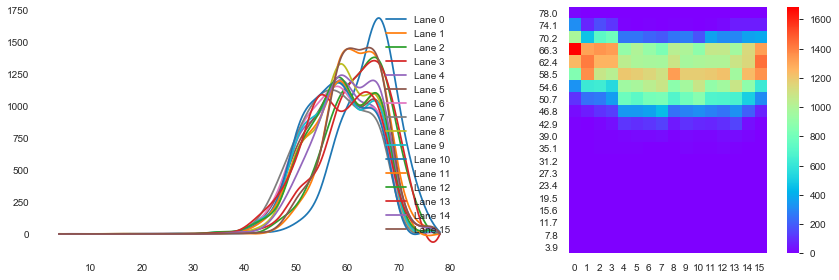

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import NaN
from scipy.interpolate import interp1d

eye_width = [ 3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. , 42.9,
       46.8, 50.7, 54.6, 58.5, 62.4, 66.3, 70.2, 74.1, 78. ]
rows =np.array([[      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN, 1.000e+00,       NaN,       NaN,       NaN,
              NaN,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN, 1.000e+00,       NaN,
              NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN, 1.000e+00, 1.000e+00,       NaN,       NaN,
        1.000e+00,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN,       NaN, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN,       NaN, 1.000e+00, 1.000e+00,       NaN,
              NaN,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN, 1.000e+00,       NaN,       NaN, 1.000e+00,       NaN,
              NaN, 1.000e+00,       NaN,       NaN],
       [      NaN,       NaN,       NaN,       NaN,       NaN,       NaN,
              NaN,       NaN, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
              NaN,       NaN,       NaN,       NaN],
       [      NaN,       NaN,       NaN, 2.000e+00, 3.000e+00,       NaN,
        1.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00, 1.000e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 4.000e+00, 1.600e+01, 8.000e+00, 8.000e+00,
        1.600e+01, 9.000e+00, 3.000e+00, 4.000e+00],
       [3.000e+00, 5.000e+00, 1.100e+01, 1.200e+01, 1.900e+01, 2.600e+01,
        2.600e+01, 2.700e+01, 1.300e+01, 2.100e+01, 1.800e+01, 1.500e+01,
        2.900e+01, 3.100e+01, 1.500e+01, 4.000e+00],
       [1.000e+01, 3.000e+00, 1.600e+01, 3.900e+01, 1.170e+02, 1.010e+02,
        1.130e+02, 1.410e+02, 5.400e+01, 1.110e+02, 9.100e+01, 8.500e+01,
        1.030e+02, 1.500e+02, 3.800e+01, 1.000e+01],
       [2.800e+01, 6.400e+01, 1.110e+02, 1.350e+02, 3.440e+02, 3.490e+02,
        3.730e+02, 4.500e+02, 2.490e+02, 2.940e+02, 3.220e+02, 2.850e+02,
        2.540e+02, 3.230e+02, 2.050e+02, 7.700e+01],
       [1.060e+02, 2.500e+02, 2.640e+02, 3.620e+02, 7.790e+02, 7.310e+02,
        8.130e+02, 8.280e+02, 6.950e+02, 7.960e+02, 8.710e+02, 6.870e+02,
        6.850e+02, 6.720e+02, 5.140e+02, 3.140e+02],
       [3.350e+02, 6.220e+02, 6.360e+02, 5.490e+02, 9.490e+02, 9.770e+02,
        1.037e+03, 1.085e+03, 8.880e+02, 9.640e+02, 1.087e+03, 9.050e+02,
        9.620e+02, 1.084e+03, 8.900e+02, 6.210e+02],
       [8.560e+02, 1.368e+03, 1.076e+03, 1.033e+03, 1.205e+03, 1.186e+03,
        1.150e+03, 1.105e+03, 1.328e+03, 1.183e+03, 1.182e+03, 1.197e+03,
        1.225e+03, 9.620e+02, 1.239e+03, 1.354e+03],
       [1.247e+03, 1.414e+03, 1.263e+03, 1.263e+03, 1.044e+03, 9.950e+02,
        9.770e+02, 9.730e+02, 1.093e+03, 9.710e+02, 9.930e+02, 1.007e+03,
        1.006e+03, 1.090e+03, 1.145e+03, 1.441e+03],
       [1.687e+03, 1.317e+03, 1.348e+03, 1.327e+03, 9.130e+02, 1.004e+03,
        9.200e+02, 8.320e+02, 1.032e+03, 9.990e+02, 8.900e+02, 1.070e+03,
        1.067e+03, 9.560e+02, 1.139e+03, 1.324e+03],
       [9.860e+02, 4.690e+02, 7.250e+02, 7.890e+02, 2.630e+02, 2.620e+02,
        2.240e+02, 1.920e+02, 2.610e+02, 2.710e+02, 1.790e+02, 3.750e+02,
        3.150e+02, 3.000e+02, 3.710e+02, 3.950e+02],
       [3.170e+02, 8.500e+01, 1.710e+02, 1.160e+02, 1.100e+01, 6.000e+00,
        7.000e+00, 5.000e+00, 1.300e+01, 9.000e+00, 6.000e+00, 9.000e+00,
        2.500e+01, 6.400e+01, 6.100e+01, 6.400e+01],
       [1.400e+01,       NaN,       NaN, 2.000e+00,       NaN,       NaN,
              NaN,       NaN,       NaN,       NaN,       NaN, 1.000e+00,
              NaN,       NaN, 1.000e+00, 1.000e+00]])

df = pd.DataFrame(data=rows)
df['eye_width'] = eye_width
df.set_index(['eye_width'], inplace=True)
df.fillna(value=0, inplace=True)

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
x = np.linspace(min(eye_width), max(eye_width), 1000)
for i in range(0, 16, 1):
    # ax.plot(df.index, df[i], label=f'Lane {i}')
    interpolation = interp1d(df.index, df[i], kind='cubic')
    ax.plot(x, interpolation(x), label=f'Lane {i}')
ax.legend(loc='best')

img = ax2.imshow(rows, origin='lower',cmap='rainbow')
ax2.set_xticks(range(16))
ax2.set_yticks(range(len(eye_width)))
ax2.set_yticklabels(eye_width)
plt.colorbar(img, ax=ax2)

plt.tight_layout()
plt.show()

In [128]:
df_new[['PREFIX','PARM_VALUE']].groupby(['PREFIX']).mean()

,PARM_VALUE
PREFIX,
N0CP1.CP,59.458506
N0CP2.CP,59.759025
N1CP1.CP,59.152078
N1CP2.CP,59.737001


In [129]:
df_new[['PREFIX','PARM_VALUE']].groupby(['PREFIX']).std()

,PARM_VALUE
PREFIX,
N0CP1.CP,6.768819
N0CP2.CP,6.846828
N1CP1.CP,6.742948
N1CP2.CP,6.772842


In [130]:
np.array(df_new[['PARM_VALUE','PREFIX']].groupby(['PARM_VALUE','PREFIX']).size().unstack())

array([[      nan,       nan,       nan, 1.000e+00],
       [      nan, 1.000e+00,       nan,       nan],
       [      nan, 2.000e+00, 1.000e+00,       nan],
       [      nan, 3.000e+00, 2.000e+00,       nan],
       [1.000e+00,       nan, 1.000e+00,       nan],
       [      nan, 1.000e+00,       nan, 2.000e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [6.000e+00, 1.300e+01, 4.000e+00, 2.000e+00],
       [2.500e+01, 6.700e+01, 1.100e+01, 1.500e+01],
       [7.300e+01, 1.290e+02, 2.500e+01, 4.800e+01],
       [3.850e+02, 4.880e+02, 1.390e+02, 1.700e+02],
       [1.151e+03, 1.683e+03, 4.360e+02, 5.930e+02],
       [2.776e+03, 4.107e+03, 9.980e+02, 1.486e+03],
       [4.023e+03, 5.920e+03, 1.533e+03, 2.115e+03],
       [5.384e+03, 8.258e+03, 2.047e+03, 2.960e+03],
       [5.175e+03, 7.967e+03, 1.836e+03, 2.944e+03],
       [5.078e+03, 8.149e+03, 1.726e+03, 2.872e+03],
       [1.738e+03, 3.042e+03, 5.530e+02, 1.044e+03],
       [2.470e+02, 4.830e+02, 6.900e+01, 1.700

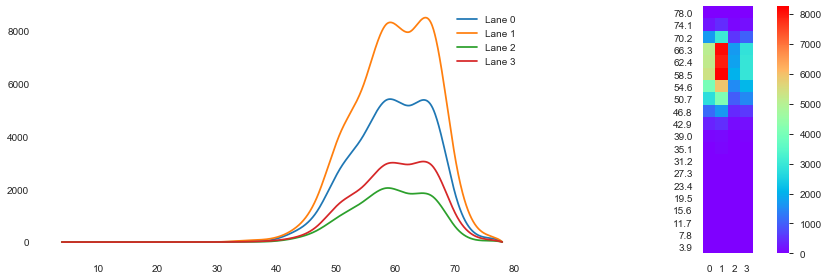

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import NaN
from scipy.interpolate import interp1d

eye_width = [ 3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. , 42.9,
       46.8, 50.7, 54.6, 58.5, 62.4, 66.3, 70.2, 74.1, 78. ]
rows =np.array([[      NaN,       NaN,       NaN, 1.000e+00],
       [      NaN, 1.000e+00,       NaN,       NaN],
       [      NaN, 2.000e+00, 1.000e+00,       NaN],
       [      NaN, 3.000e+00, 2.000e+00,       NaN],
       [1.000e+00,       NaN, 1.000e+00,       NaN],
       [      NaN, 1.000e+00,       NaN, 2.000e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [6.000e+00, 1.300e+01, 4.000e+00, 2.000e+00],
       [2.500e+01, 6.700e+01, 1.100e+01, 1.500e+01],
       [7.300e+01, 1.290e+02, 2.500e+01, 4.800e+01],
       [3.850e+02, 4.880e+02, 1.390e+02, 1.700e+02],
       [1.151e+03, 1.683e+03, 4.360e+02, 5.930e+02],
       [2.776e+03, 4.107e+03, 9.980e+02, 1.486e+03],
       [4.023e+03, 5.920e+03, 1.533e+03, 2.115e+03],
       [5.384e+03, 8.258e+03, 2.047e+03, 2.960e+03],
       [5.175e+03, 7.967e+03, 1.836e+03, 2.944e+03],
       [5.078e+03, 8.149e+03, 1.726e+03, 2.872e+03],
       [1.738e+03, 3.042e+03, 5.530e+02, 1.044e+03],
       [2.470e+02, 4.830e+02, 6.900e+01, 1.700e+02],
       [5.000e+00, 1.100e+01, 2.000e+00, 1.000e+00]])

df = pd.DataFrame(data=rows)
df['eye_width'] = eye_width
df.set_index(['eye_width'], inplace=True)
df.fillna(value=0, inplace=True)

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
x = np.linspace(min(eye_width), max(eye_width), 1000)
for i in range(0,4, 1):
    # ax.plot(df.index, df[i], label=f'Lane {i}')
    interpolation = interp1d(df.index, df[i], kind='cubic')
    ax.plot(x, interpolation(x), label=f'Lane {i}')
ax.legend(loc='best')

img = ax2.imshow(rows, origin='lower',cmap='rainbow')
ax2.set_xticks(range(4))
ax2.set_yticks(range(len(eye_width)))
ax2.set_yticklabels(eye_width)
plt.colorbar(img, ax=ax2)

plt.tight_layout()
plt.show()